In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df = pd.read_csv('D:EngineFaultDB_Final.csv')
df

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
0,0,3.549,1.889,7.428,5.227,1192.769,3.057,11.720,24.901,0.460,196.089,14.356,1.080,1.047,15.385
1,0,3.559,1.899,7.646,5.327,1145.191,2.914,11.276,25.030,0.478,196.283,14.492,1.107,1.083,15.926
2,0,3.539,1.899,7.578,5.100,1208.505,2.976,11.926,24.213,0.464,200.367,14.443,1.099,1.072,15.754
3,0,3.519,1.889,7.371,5.255,1164.127,2.908,11.786,24.407,0.471,195.345,13.853,1.076,1.006,14.787
4,0,3.549,1.879,7.405,5.177,1172.032,2.898,12.169,24.875,0.468,194.979,13.752,1.060,0.984,14.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55994,3,1.971,1.278,92.665,3.589,4584.034,5.423,5.623,95.090,0.902,162.065,13.123,0.568,0.966,14.200
55995,3,1.879,1.258,96.644,3.579,4662.496,5.655,5.578,100.032,0.926,161.237,13.591,0.585,1.030,15.147
55996,3,1.960,1.288,93.961,3.493,4792.675,5.542,5.572,98.595,0.925,160.030,12.999,0.579,0.974,14.324
55997,3,1.930,1.299,95.379,3.618,4563.732,5.525,5.568,98.575,0.942,159.800,13.187,0.579,0.990,14.550


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fault                55999 non-null  int64  
 1   MAP                  55999 non-null  float64
 2   TPS                  55999 non-null  float64
 3   Force                55999 non-null  float64
 4   Power                55999 non-null  float64
 5   RPM                  55999 non-null  float64
 6   Consumption L/H      55999 non-null  float64
 7   Consumption L/100KM  55999 non-null  float64
 8   Speed                55999 non-null  float64
 9   CO                   55999 non-null  float64
 10  HC                   55999 non-null  float64
 11  CO2                  55999 non-null  float64
 12  O2                   55999 non-null  float64
 13  Lambda               55999 non-null  float64
 14  AFR                  55999 non-null  float64
dtypes: float64(14), int64(1)
memory usag

In [4]:
df.describe()

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,1.482187,1.832515,1.395269,286.691705,5.657126,2398.053774,4.497634,8.939794,51.688740,1.932430,188.446083,13.035230,0.585910,0.963907,14.169408
std,1.149430,0.837786,0.906950,378.774917,7.684147,932.008680,2.221497,3.154110,20.140345,1.988789,111.047015,1.046567,0.223713,0.065973,0.969802
min,0.000000,0.453000,0.382000,2.580000,0.465000,1066.452000,1.917000,5.187000,22.757000,0.421000,1.787000,8.649000,0.203000,0.695000,10.210000
25%,0.000000,1.217000,0.901000,76.848500,0.994000,1830.200500,2.981000,6.573000,39.412000,0.641000,158.803000,12.842000,0.415000,0.937000,13.780000
50%,2.000000,1.543000,1.013000,92.500000,2.398000,2105.588000,3.824000,8.068000,45.393000,1.129000,178.265000,13.242000,0.533000,0.977000,14.365000
75%,3.000000,1.940000,1.258000,257.989500,4.696000,2761.373500,5.144500,9.924000,59.508000,2.455000,203.678000,13.639000,0.789000,1.008000,14.823000
max,3.000000,4.547000,4.048000,1537.118000,33.946000,5013.402000,14.810000,20.043000,107.539000,10.132000,975.657000,15.129000,1.151000,1.149000,16.893000


In [5]:
df.shape

(55999, 15)

Data Visualization with Matplot Library and Seaborn

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

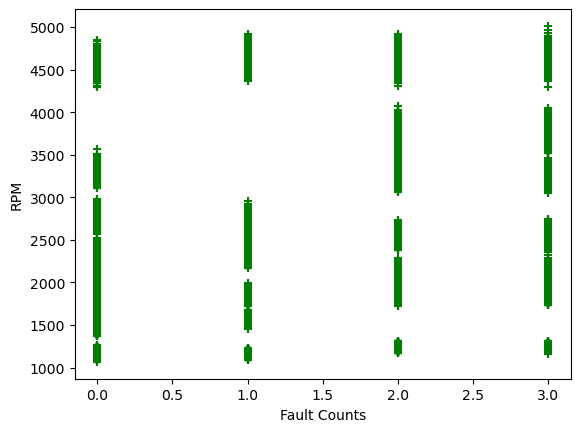

In [8]:
plt.xlabel('Fault Counts')
plt.ylabel('RPM')
plt.scatter(df['Fault'],df['RPM'],color= 'green',marker='+')
plt.show()

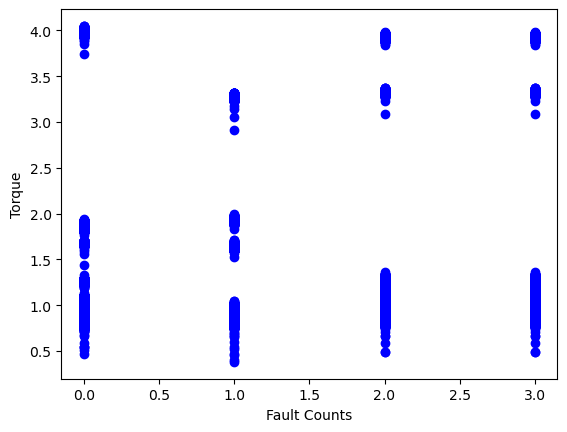

In [9]:
plt.xlabel('Fault Counts')
plt.ylabel('Torque')
plt.scatter(df['Fault'],df['TPS'],color= 'blue',marker='o')
plt.show()

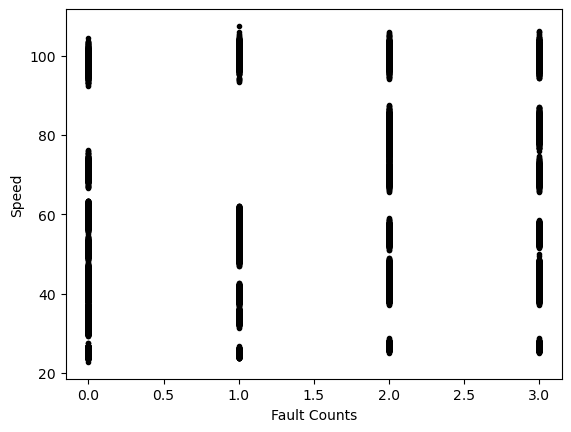

In [10]:
plt.xlabel('Fault Counts')
plt.ylabel('Speed')
plt.scatter(df['Fault'],df['Speed'],color= 'black',marker='.')
plt.show()

(array([  176.,   953.,  2625.,  2496.,  4393., 13244., 19859., 10984.,
        1246.,    23.]), array([0.695 , 0.7404, 0.7858, 0.8312, 0.8766, 0.922 , 0.9674, 1.0128,
       1.0582, 1.1036, 1.149 ]), <BarContainer object of 10 artists>)


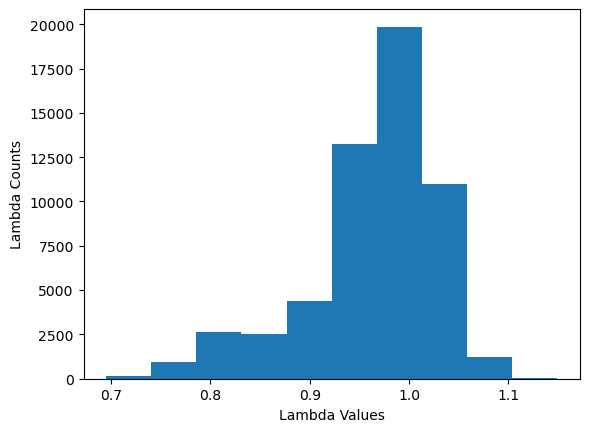

In [11]:
plt.xlabel('Lambda Values')
plt.ylabel('Lambda Counts')
print(plt.hist(df['Lambda']))

(array([3.8112e+04, 4.8870e+03, 2.3690e+03, 3.5680e+03, 1.0630e+03,
       1.1760e+03, 2.8240e+03, 0.0000e+00, 2.7000e+01, 1.9730e+03]), array([ 0.465 ,  3.8131,  7.1612, 10.5093, 13.8574, 17.2055, 20.5536,
       23.9017, 27.2498, 30.5979, 33.946 ]), <BarContainer object of 10 artists>)


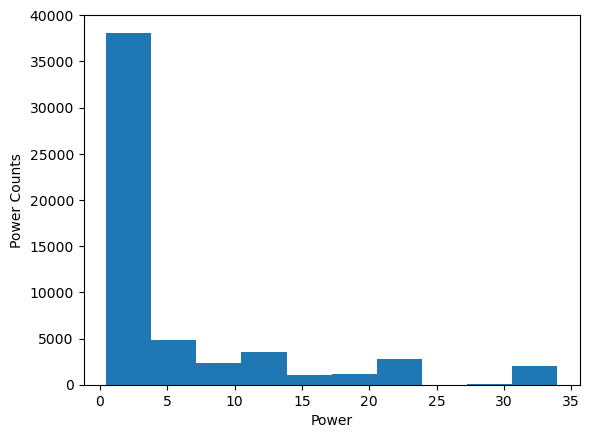

In [12]:
plt.xlabel('Power')
plt.ylabel('Power Counts')
print(plt.hist(df['Power']))

(array([18479., 16445., 12049.,  2779.,  2247.,  1684.,  1316.,     0.,
         100.,   900.]), array([ 1.917 ,  3.2063,  4.4956,  5.7849,  7.0742,  8.3635,  9.6528,
       10.9421, 12.2314, 13.5207, 14.81  ]), <BarContainer object of 10 artists>)


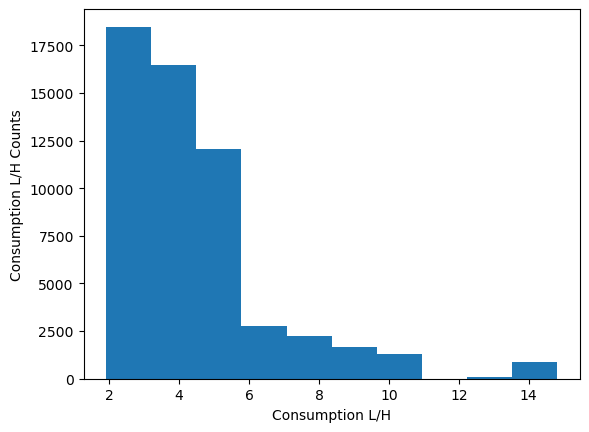

In [13]:
plt.xlabel('Consumption L/H')
plt.ylabel('Consumption L/H Counts')
print(plt.hist(df['Consumption L/H']))

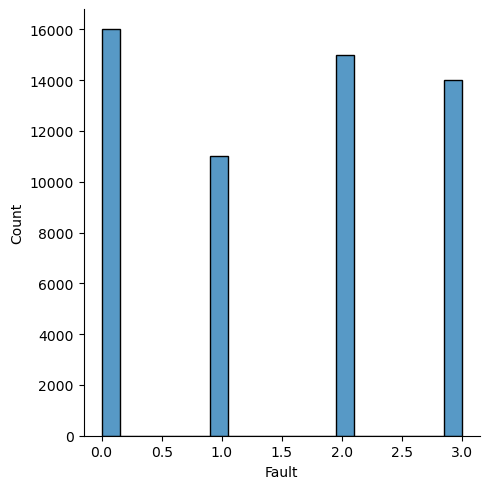

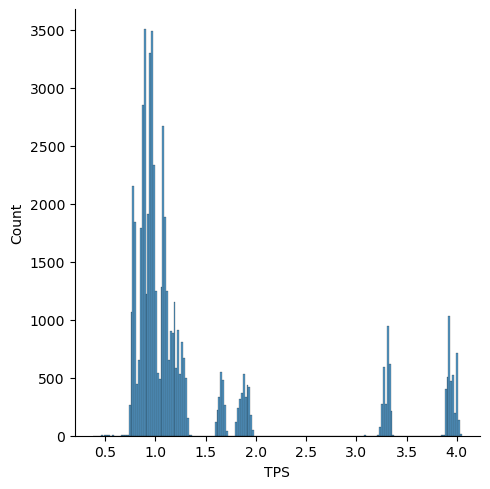

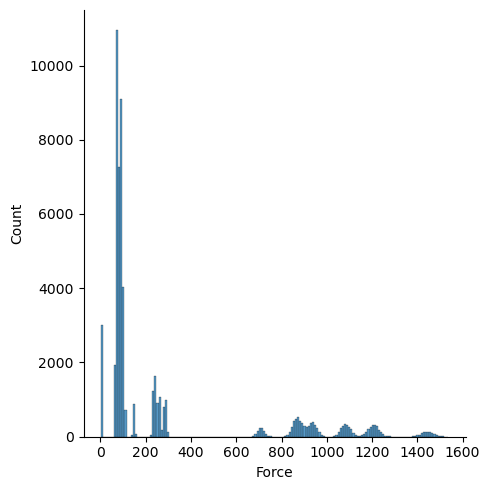

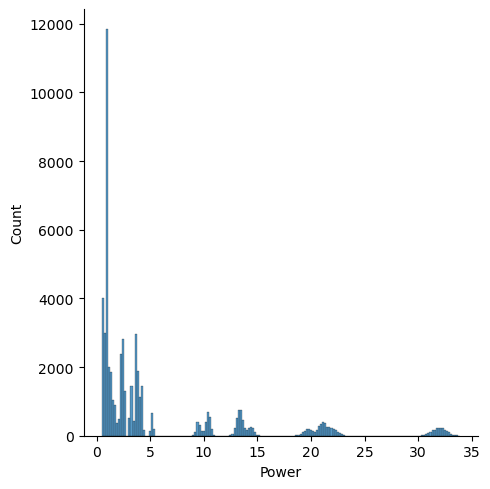

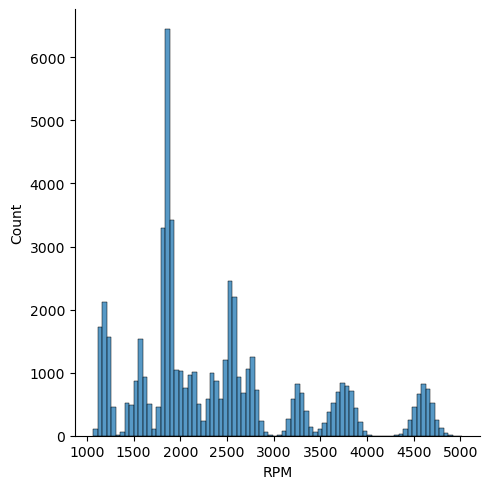

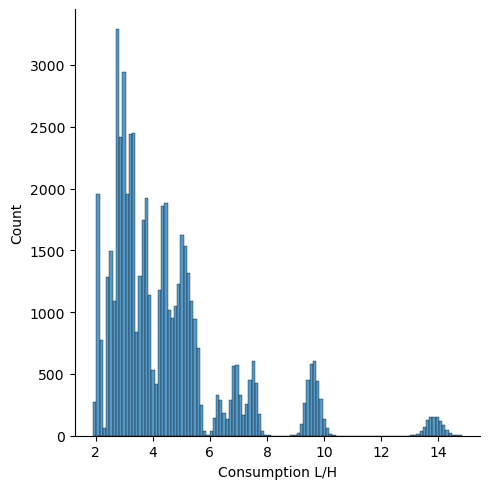

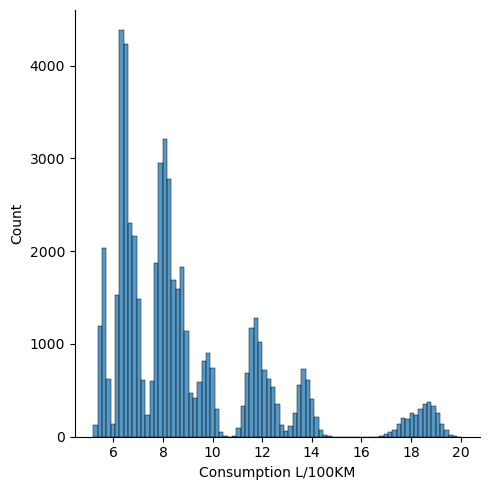

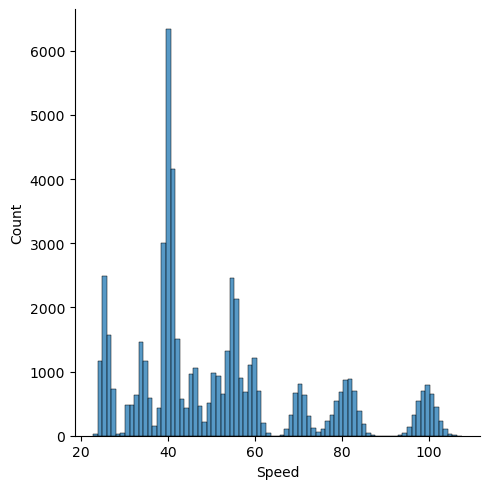

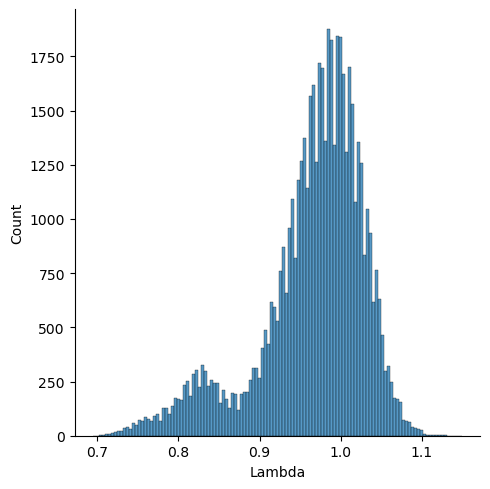

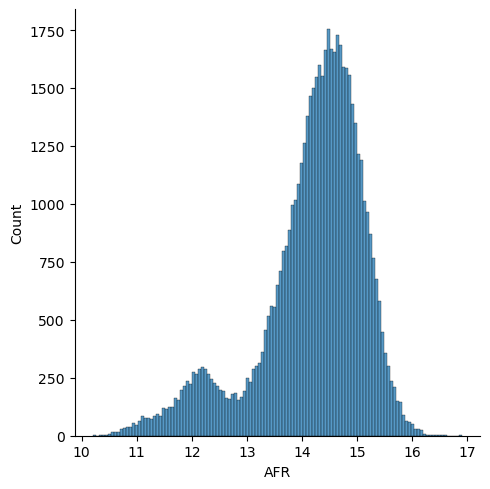

In [14]:
sns.displot(df['Fault'])
sns.displot(df['TPS'])
sns.displot(df['Force'])
sns.displot(df['Power'])
sns.displot(df['RPM'])
sns.displot(df['Consumption L/H'])
sns.displot(df['Consumption L/100KM'])
sns.displot(df['Speed'])
sns.displot(df['Lambda'])
sns.displot(df['AFR'])

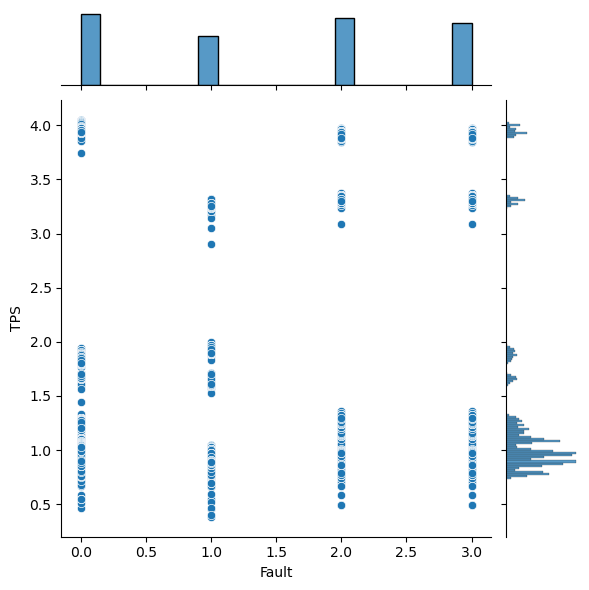

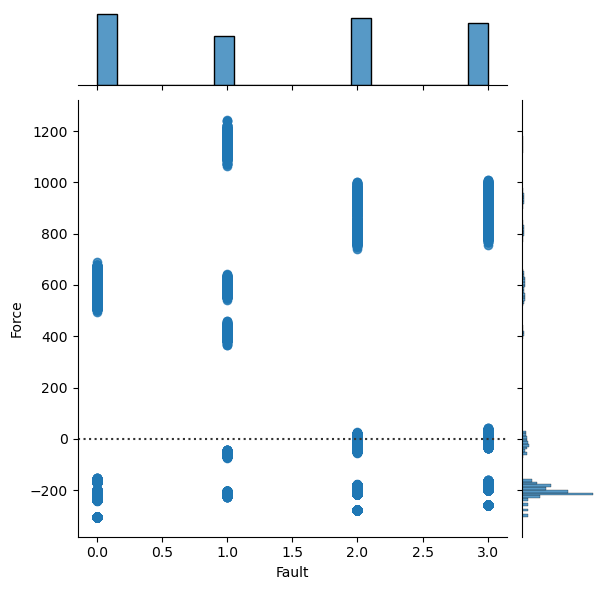

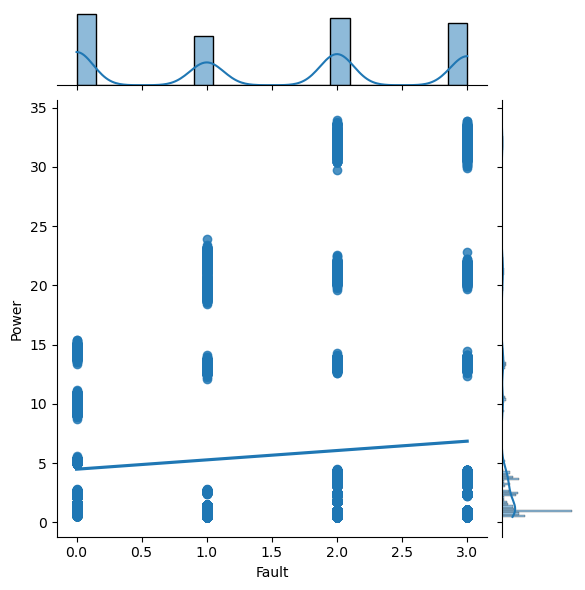

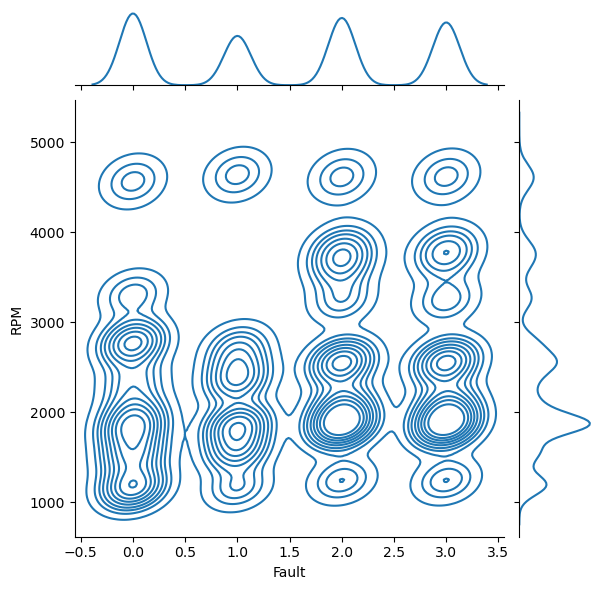

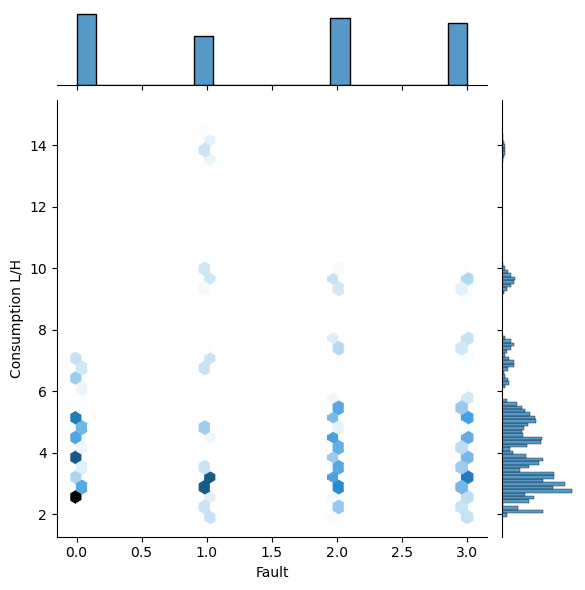

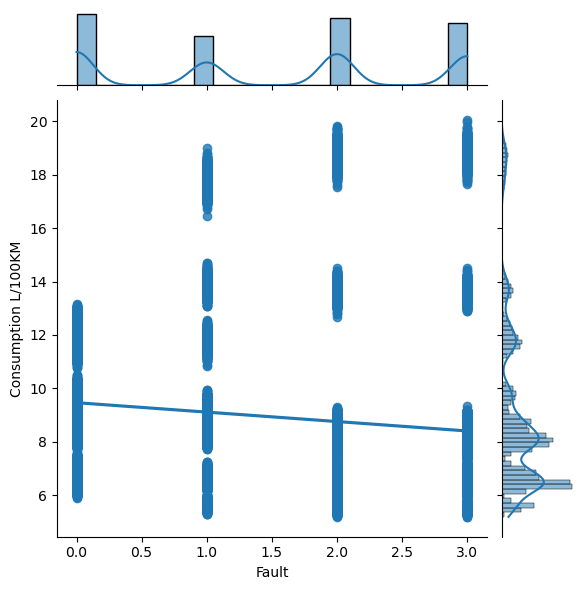

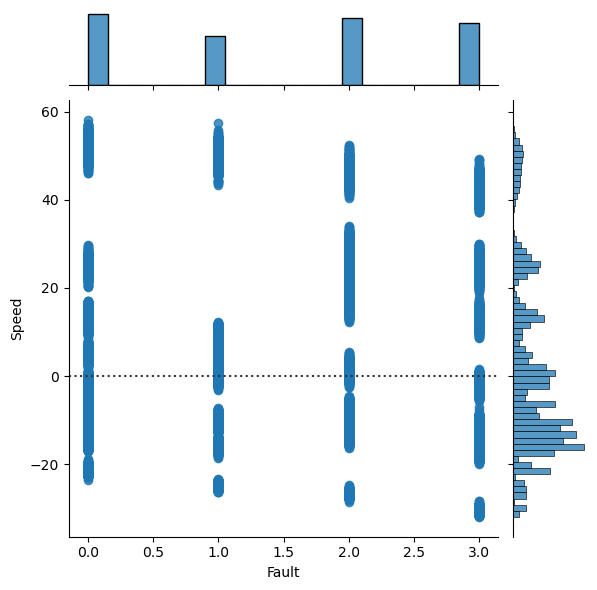

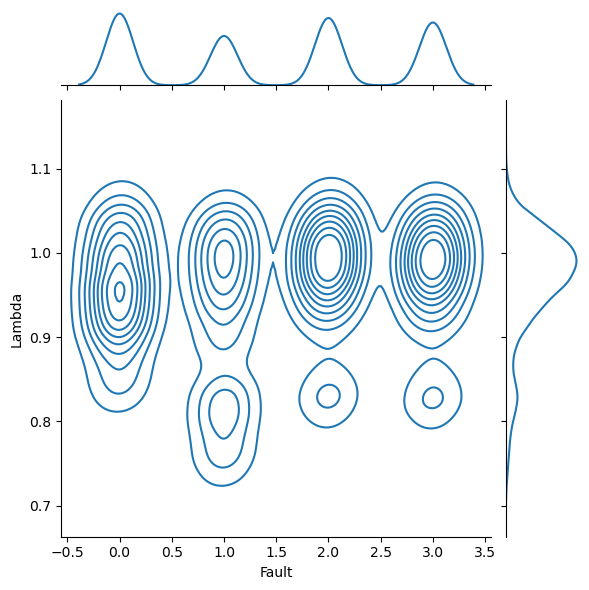

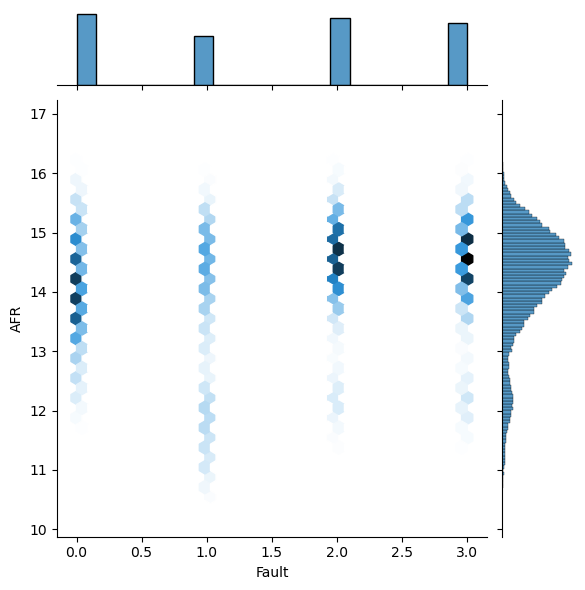

In [7]:
sns.jointplot(x=df['Fault'],y=df['TPS'],kind='scatter')
sns.jointplot(x=df['Fault'],y=df['Force'],kind='resid')
sns.jointplot(x=df['Fault'],y=df['Power'],kind='reg')
sns.jointplot(x=df['Fault'],y=df['RPM'],kind='kde')
sns.jointplot(x=df['Fault'],y=df['Consumption L/H'],kind='hex')
sns.jointplot(x=df['Fault'],y=df['Consumption L/100KM'],kind='reg')
sns.jointplot(x=df['Fault'],y=df['Speed'],kind='resid')
sns.jointplot(x=df['Fault'],y=df['Lambda'],kind='kde')
sns.jointplot(x=df['Fault'],y=df['AFR'],kind='hex')

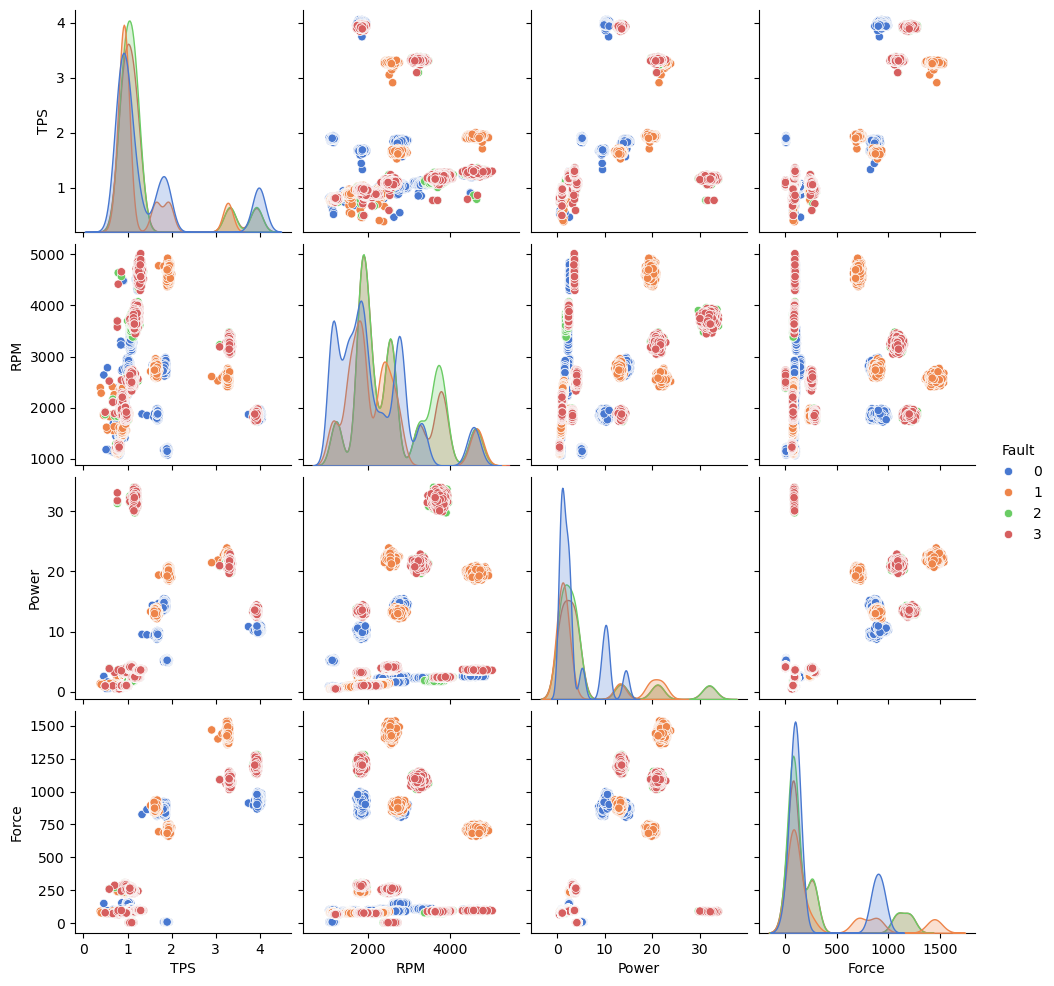

In [9]:
sns.pairplot(df[['TPS', 'RPM', 'Power', 'Force', 'Fault']], hue='Fault', palette='muted')

<Axes: >

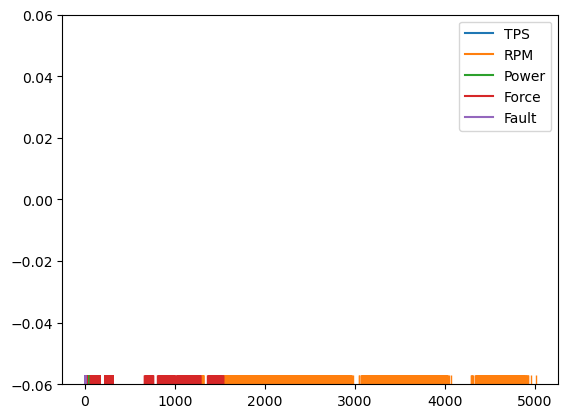

In [11]:
sns.rugplot(df[['TPS', 'RPM', 'Power', 'Force', 'Fault']])

<Axes: ylabel='Density'>

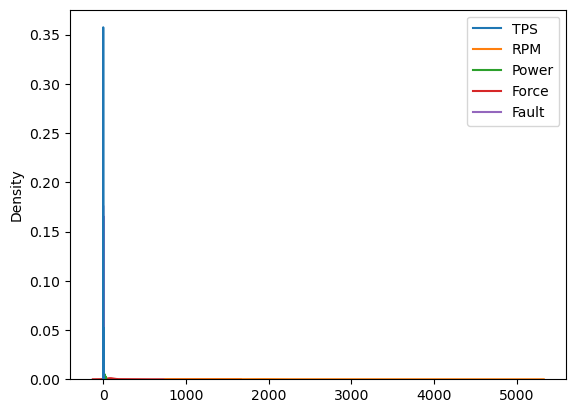

In [13]:
sns.kdeplot(df[['TPS', 'RPM', 'Power', 'Force', 'Fault']])

<Axes: xlabel='TPS', ylabel='RPM'>

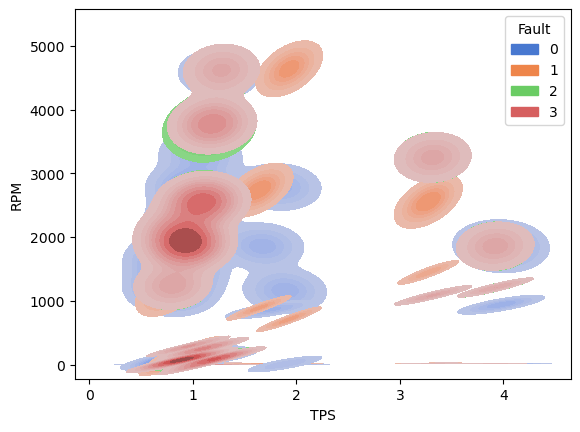

In [19]:
sns.kdeplot(data=df, x='TPS', y='RPM', hue='Fault', fill=True, palette='muted')


<Axes: xlabel='TPS', ylabel='Power'>

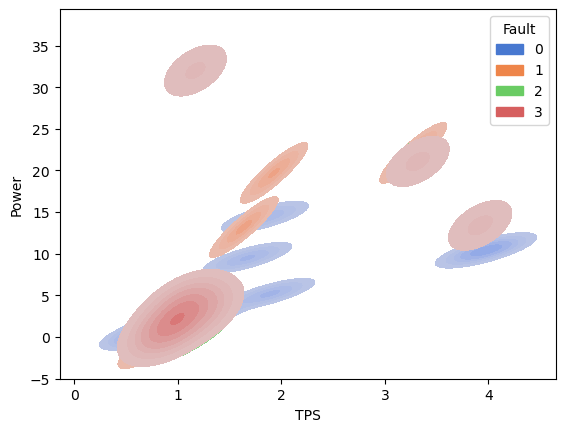

In [21]:
sns.kdeplot(data=df, x='TPS', y='Power', hue='Fault', fill=True, palette='muted')


<Axes: xlabel='TPS', ylabel='Force'>

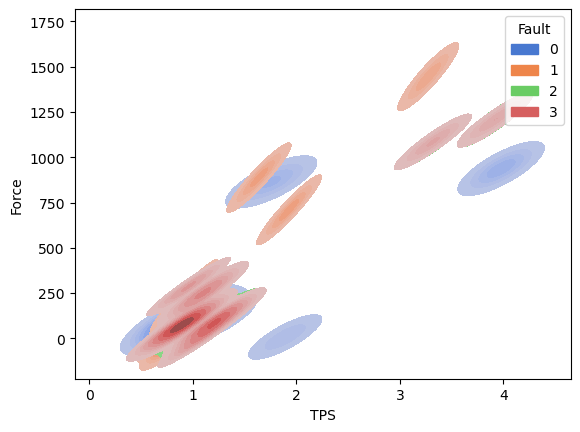

In [23]:
sns.kdeplot(data=df, x='TPS', y='Force', hue='Fault', fill=True, palette='muted')

<Axes: xlabel='TPS', ylabel='RPM'>

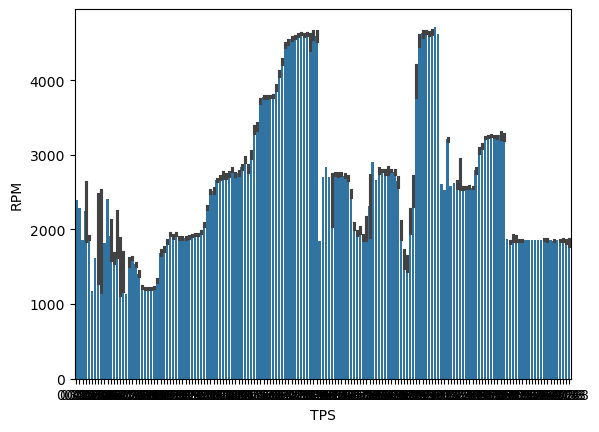

In [25]:
sns.barplot(data=df, x='TPS', y='RPM')

<Axes: xlabel='TPS', ylabel='Power'>

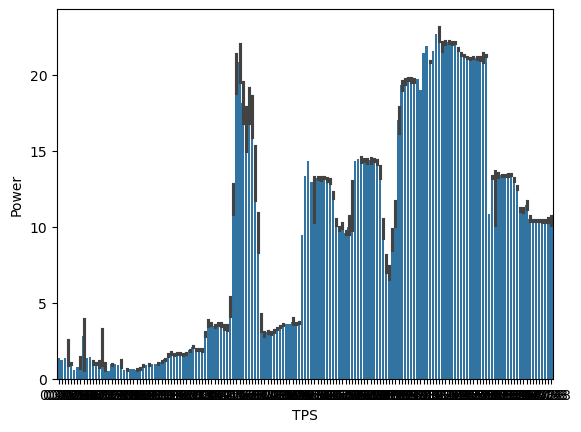

In [27]:
sns.barplot(data=df, x='TPS', y='Power')

<Axes: xlabel='TPS', ylabel='Force'>

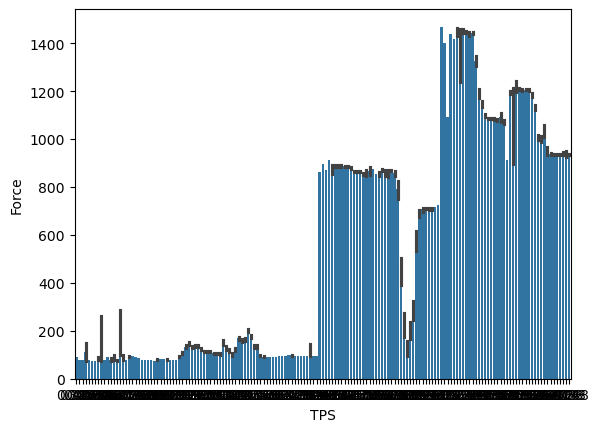

In [29]:
sns.barplot(data=df, x='TPS', y='Force')

<Axes: xlabel='TPS', ylabel='Fault'>

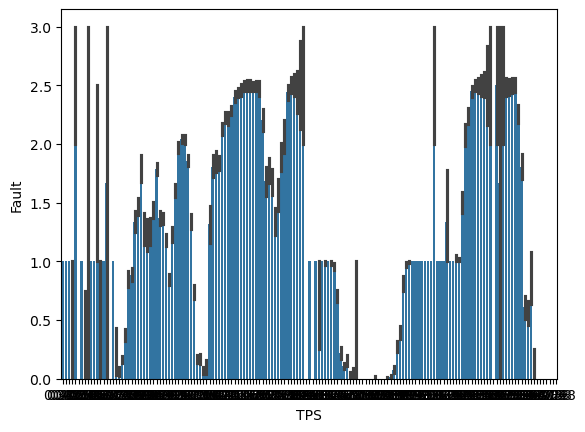

In [31]:
sns.barplot(data=df, x='TPS', y='Fault')

<Axes: xlabel='Fault', ylabel='count'>

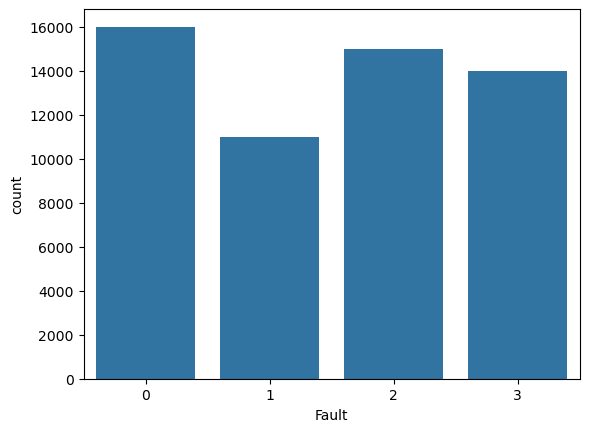

In [38]:
sns.countplot(x='Fault',data=df)


<Axes: xlabel='MAP', ylabel='count'>

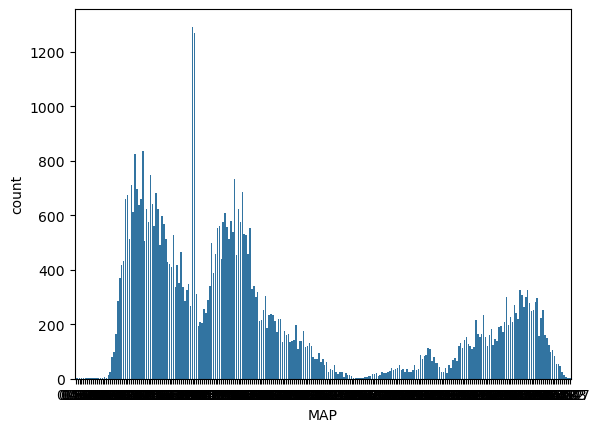

In [40]:
sns.countplot(x='MAP',data=df)


<Axes: xlabel='TPS', ylabel='count'>

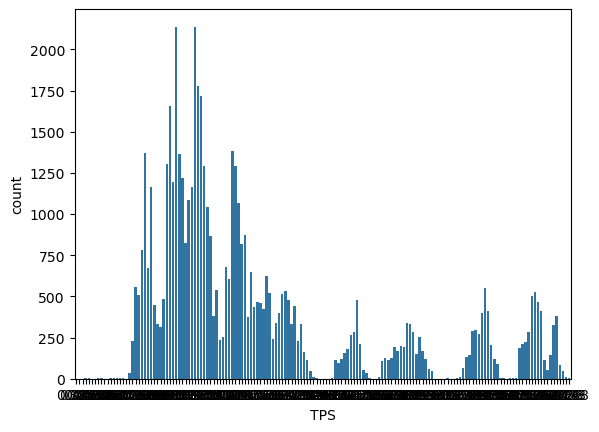

In [42]:
sns.countplot(x='TPS',data=df)


<Axes: xlabel='Force', ylabel='count'>

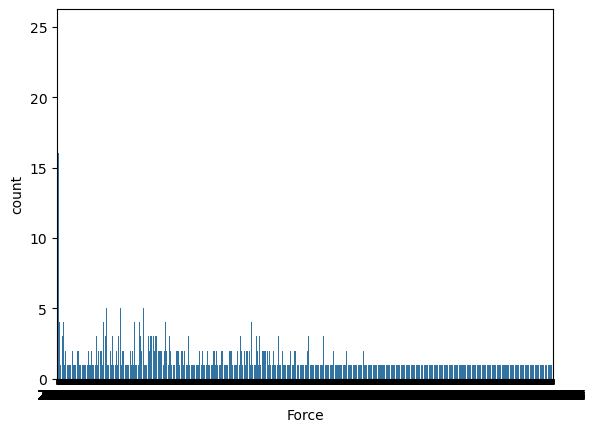

In [9]:
sns.countplot(x='Force',data=df)


<Axes: xlabel='Power', ylabel='count'>

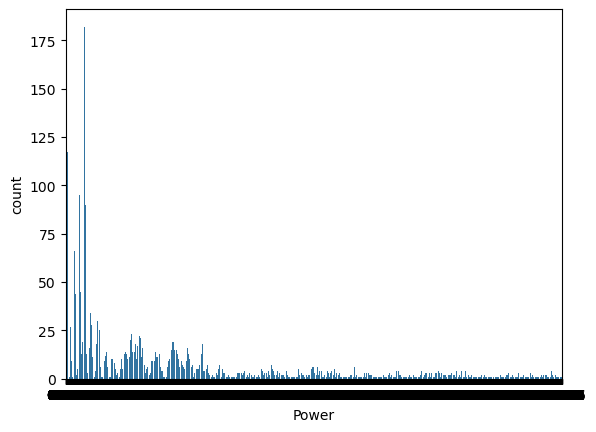

In [54]:
sns.countplot(x='Power',data=df)


<Axes: xlabel='RPM', ylabel='count'>

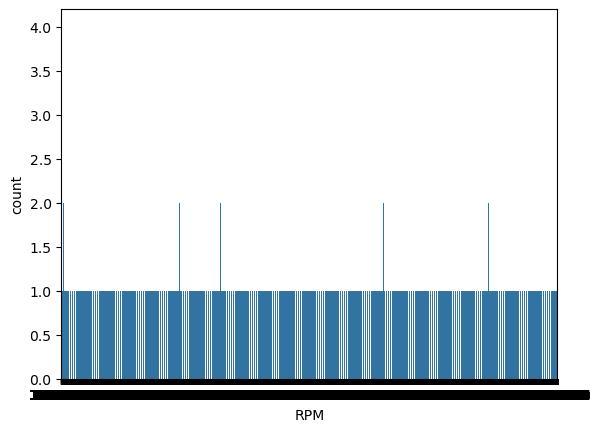

In [11]:
sns.countplot(x='RPM',data=df)


<Axes: xlabel='Consumption L/H', ylabel='count'>

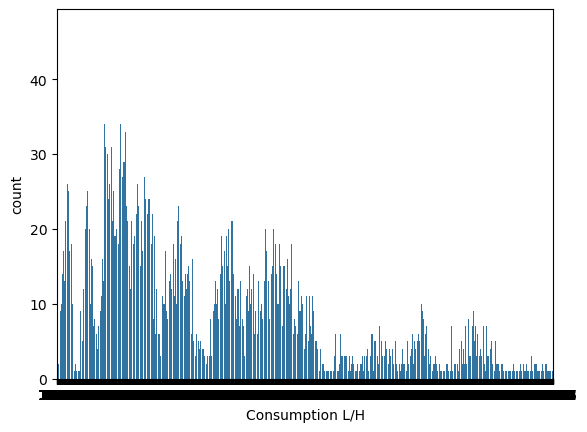

In [13]:
sns.countplot(x='Consumption L/H',data=df)


<Axes: xlabel='Consumption L/100KM', ylabel='count'>

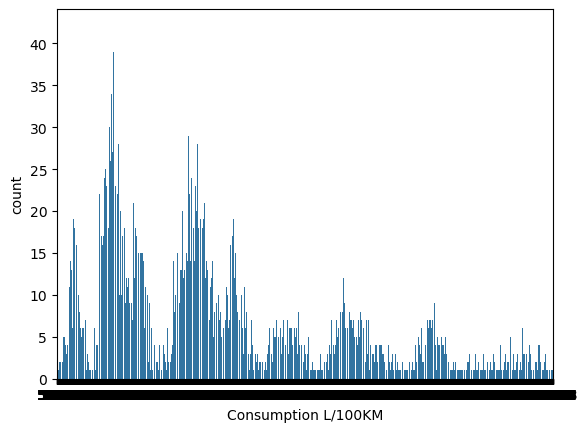

In [15]:
sns.countplot(x='Consumption L/100KM',data=df)


<Axes: xlabel='Speed', ylabel='count'>

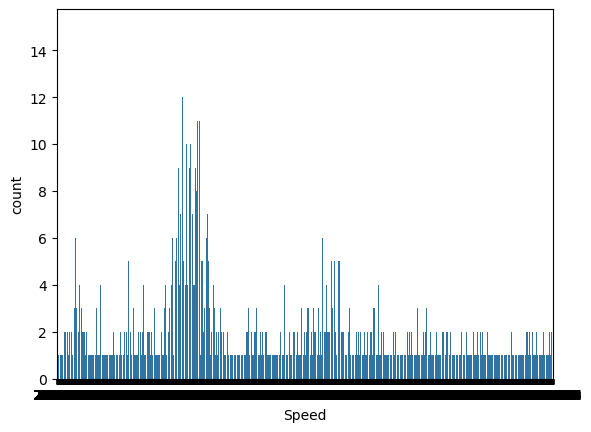

In [17]:
sns.countplot(x='Speed',data=df)


<Axes: xlabel='Lambda', ylabel='count'>

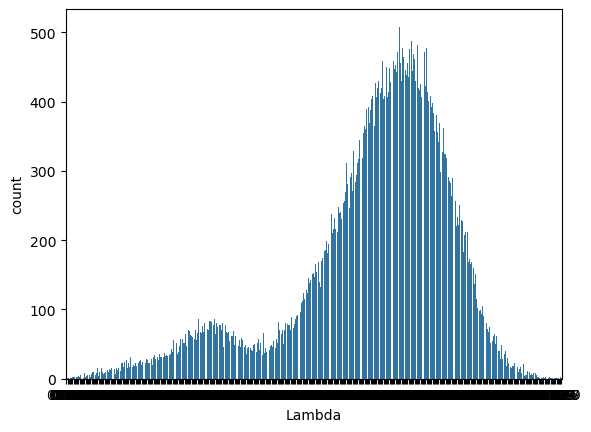

In [19]:
sns.countplot(x='Lambda',data=df)


<Axes: xlabel='AFR', ylabel='count'>

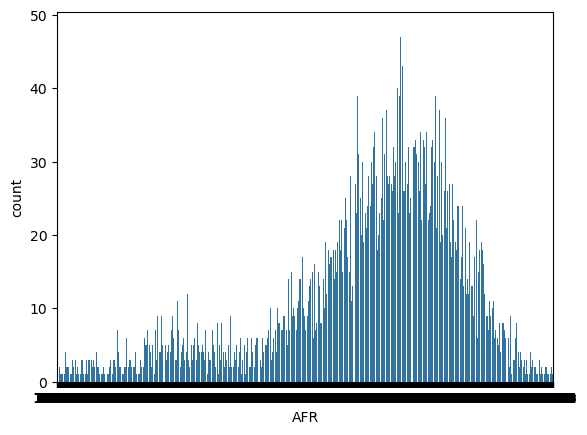

In [21]:
sns.countplot(x='AFR',data=df)

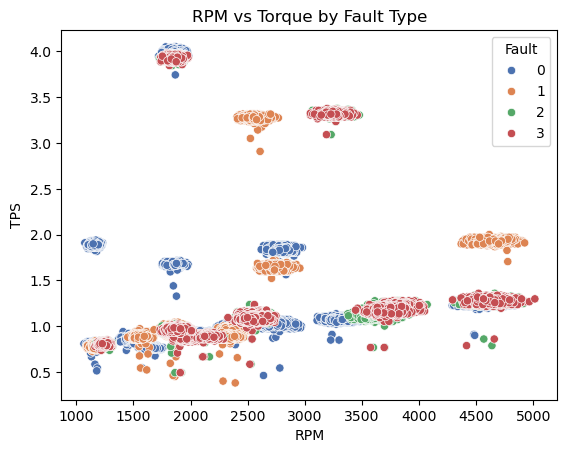

In [39]:
sns.scatterplot(data=df, x='RPM', y='TPS', hue='Fault', palette='deep')
plt.title("RPM vs Torque by Fault Type")
plt.show()

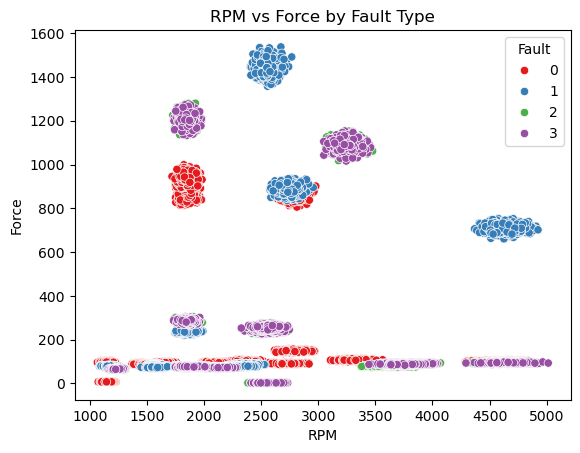

In [41]:
sns.scatterplot(data=df, x='RPM', y='Force', hue='Fault', palette='Set1')
plt.title("RPM vs Force by Fault Type")
plt.show()

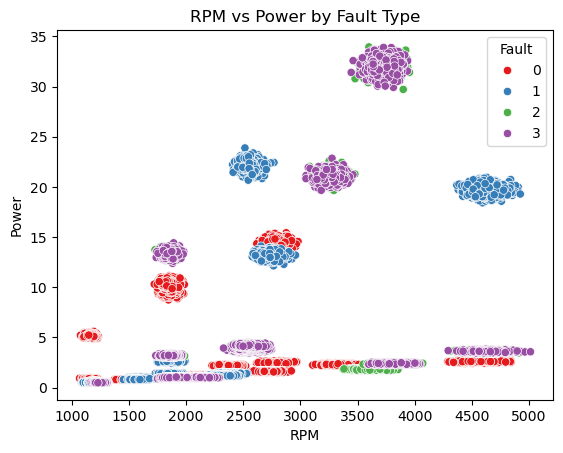

In [43]:
sns.scatterplot(data=df, x='RPM', y='Power', hue='Fault', palette='Set1')
plt.title("RPM vs Power by Fault Type")
plt.show()

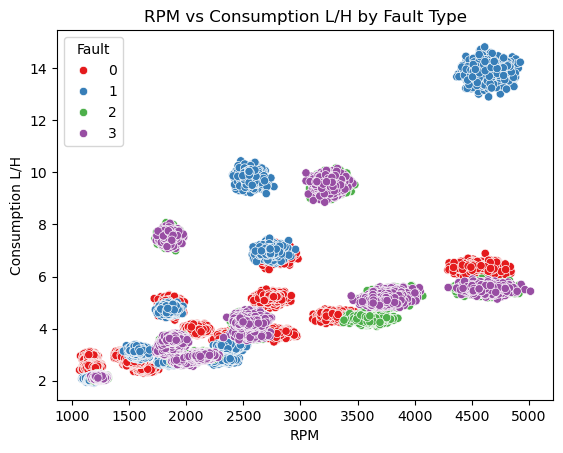

In [45]:
sns.scatterplot(data=df, x='RPM', y='Consumption L/H', hue='Fault', palette='Set1')
plt.title("RPM vs Consumption L/H by Fault Type")
plt.show()

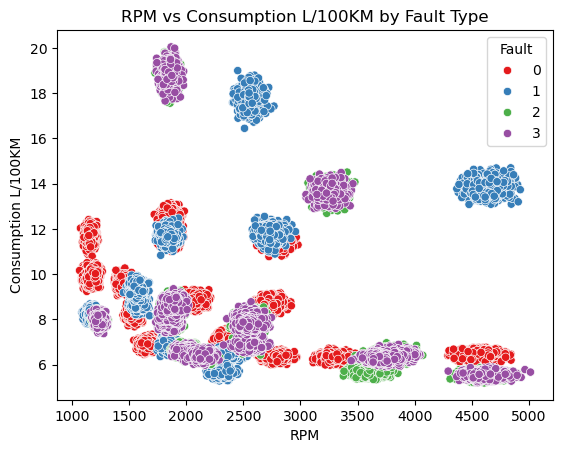

In [47]:
sns.scatterplot(data=df, x='RPM', y='Consumption L/100KM', hue='Fault', palette='Set1')
plt.title("RPM vs Consumption L/100KM by Fault Type")
plt.show()

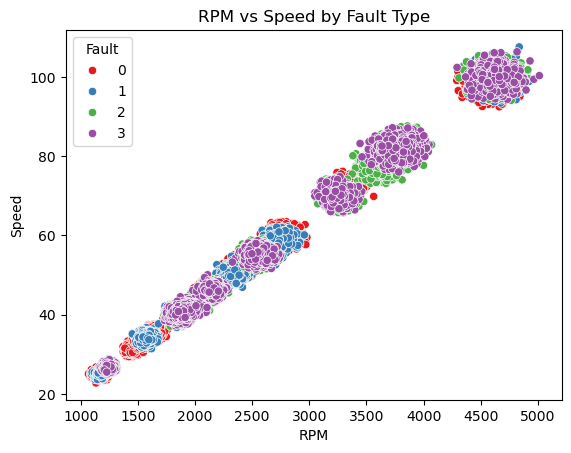

In [49]:
sns.scatterplot(data=df, x='RPM', y='Speed', hue='Fault', palette='Set1')
plt.title("RPM vs Speed by Fault Type")
plt.show()

Finding Co-relation using MatplotLib and Seaborn

In [29]:
corr = df.corr()
corr

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
Fault,1.000000,-0.072753,-0.025270,-0.049601,0.117879,0.205279,0.056363,-0.128618,0.203806,-0.224785,-0.172228,-0.078492,-0.068178,0.187571,0.187584
MAP,-0.072753,1.000000,0.884219,0.880061,0.629456,0.201352,0.697801,0.739555,0.201107,0.134665,0.044645,-0.049704,-0.157730,-0.144828,-0.144827
TPS,-0.025270,0.884219,1.000000,0.891460,0.582596,0.092894,0.647843,0.806927,0.092682,0.253781,-0.098425,-0.163978,-0.330770,-0.261230,-0.261220
Force,-0.049601,0.880061,0.891460,1.000000,0.621402,0.072542,0.719759,0.848365,0.071914,0.216722,-0.002452,-0.125891,-0.274184,-0.231231,-0.231229
Power,0.117879,0.629456,0.582596,0.621402,1.000000,0.403647,0.695179,0.473038,0.405901,0.060640,0.101330,-0.041272,-0.161577,-0.078817,-0.078808
RPM,0.205279,0.201352,0.092894,0.072542,0.403647,1.000000,0.603519,-0.197747,0.996894,-0.020227,0.236539,-0.015877,-0.080016,-0.004557,-0.004525
Consumption L/H,0.056363,0.697801,0.647843,0.719759,0.695179,0.603519,1.000000,0.614128,0.603262,0.358751,0.375354,-0.313437,-0.251838,-0.347567,-0.347545
Consumption L/100KM,-0.128618,0.739555,0.806927,0.848365,0.473038,-0.197747,0.614128,1.000000,-0.197161,0.441402,0.027346,-0.349849,-0.290361,-0.412699,-0.412697
Speed,0.203806,0.201107,0.092682,0.071914,0.405901,0.996894,0.603262,-0.197161,1.000000,-0.019955,0.236040,-0.016246,-0.080890,-0.005199,-0.005167
CO,-0.224785,0.134665,0.253781,0.216722,0.060640,-0.020227,0.358751,0.441402,-0.019955,1.000000,0.445796,-0.868488,-0.435150,-0.899408,-0.899417


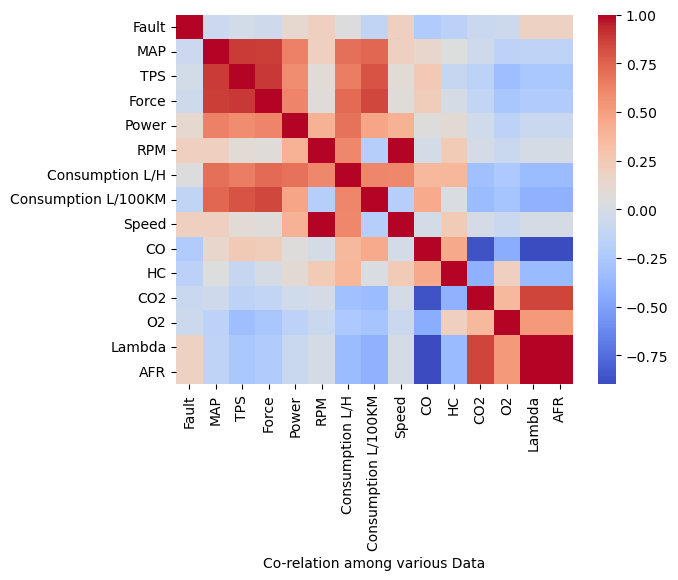

In [33]:
sns.heatmap(corr, cmap = 'coolwarm')
plt.xlabel('Co-relation among various Data')
plt.show()